In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.mplot3d import Axes3D


%matplotlib notebook

<IPython.core.display.Javascript object>


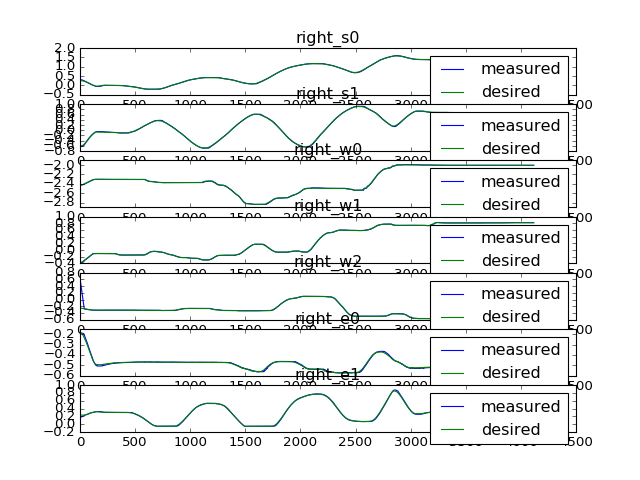

(0.29182484117006874, 'right_s0')
(0.41289060128060673, 'right_s1')
(0.14732407169341968, 'right_w0')
(0.1760694509805489, 'right_w1')
(0.37164583871162077, 'right_w2')
(0.1646054564175724, 'right_e0')
(0.31434721410561756, 'right_e1')


<IPython.core.display.Javascript object>


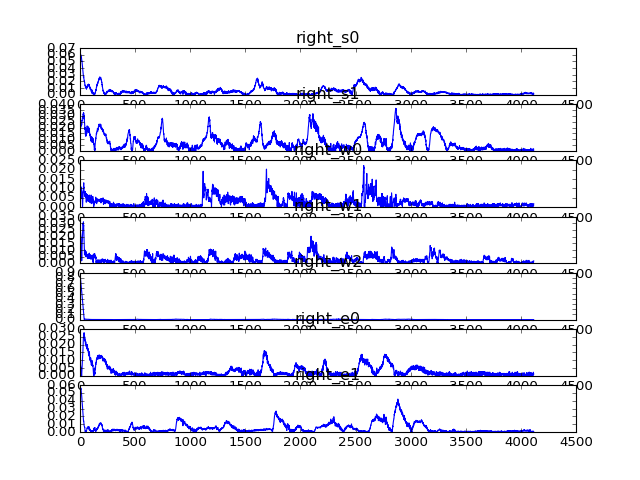

In [6]:
pkl_file = open('../anthony/data/physical/supervised_test/zig_zag_truth_1loop1.pkl', 'rb')
vicon_true, state_true, _, _, error_true, average_error_true = pickle.load(pkl_file)
pkl_file.close()

error_true = dict()

theta_fig = plt.figure()
for i, name in enumerate(state_true['theta_measured'].keys()):
    theta_fig.add_subplot(7, 1, i+1)
    plt.plot(state_true['theta_measured'][name])
    plt.plot(state_true['theta_desired'][name])
    plt.title(name)
    plt.legend(['measured', 'desired'])
    error_true[name] = (np.abs(np.array(state_true['theta_measured'][name]) - np.array(state_true['theta_desired'][name])))
 
for key in error_true.keys():
    print(np.mean(error_true[key] * 180/np.pi), key)

err_fig = plt.figure()
for i, name in enumerate(error_true.keys()):
    err_fig.add_subplot(7, 1, i+1)
    plt.plot(error_true[name])
    plt.title(name)
    
plt.show()

<IPython.core.display.Javascript object>


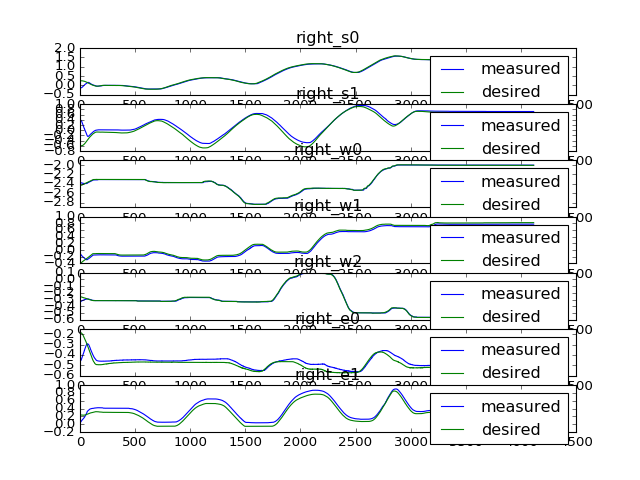

(0.9772361549652739, 'right_s0')
(4.811862281203014, 'right_s1')
(0.3076171875112128, 'right_w0')
(2.3838117153349816, 'right_w1')
(0.20924992314683993, 'right_w2')
(1.5592687095795528, 'right_e0')
(4.68933416797129, 'right_e1')


<IPython.core.display.Javascript object>


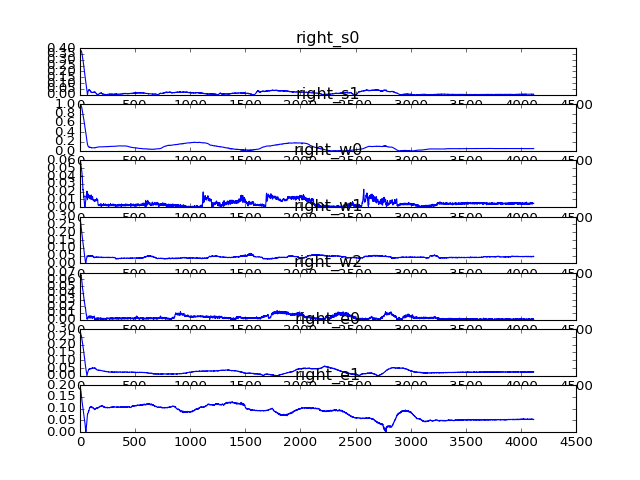

In [7]:
pkl_file = open('../anthony/data/physical/supervised_test/zig_zag_ref_1loop1.pkl', 'rb')
vicon_1, state_1, _, _, error_1, average_error_1 = pickle.load(pkl_file)
pkl_file.close()

error = dict()

theta_fig = plt.figure()
for i, name in enumerate(state_1['theta_measured'].keys()):
    theta_fig.add_subplot(7, 1, i+1)
    plt.plot(state_1['theta_measured'][name])
    plt.plot(state_1['theta_desired'][name])
    plt.title(name)
    plt.legend(['measured', 'desired'])
    error[name] = (np.abs(np.array(state_1['theta_measured'][name]) - np.array(state_1['theta_desired'][name])))
 
for key in error.keys():
    print(np.mean(error[key] * 180/np.pi), key)

err_fig = plt.figure()
for i, name in enumerate(error.keys()):
    err_fig.add_subplot(7, 1, i+1)
    plt.plot(error[name])
    plt.title(name)
plt.show()

<IPython.core.display.Javascript object>


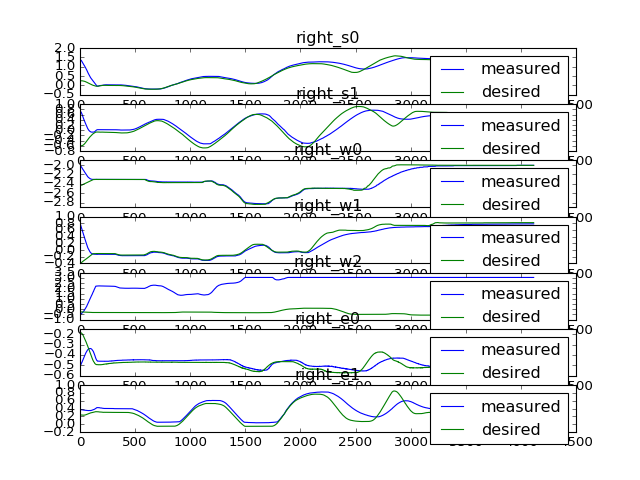

(5.217916114779819, 'right_s0')
(8.322486460481958, 'right_s1')
(1.8729221065129595, 'right_w0')
(3.761663244626435, 'right_w1')
(170.54623396033975, 'right_w2')
(1.548578588018775, 'right_e0')
(6.160552140895709, 'right_e1')


<IPython.core.display.Javascript object>


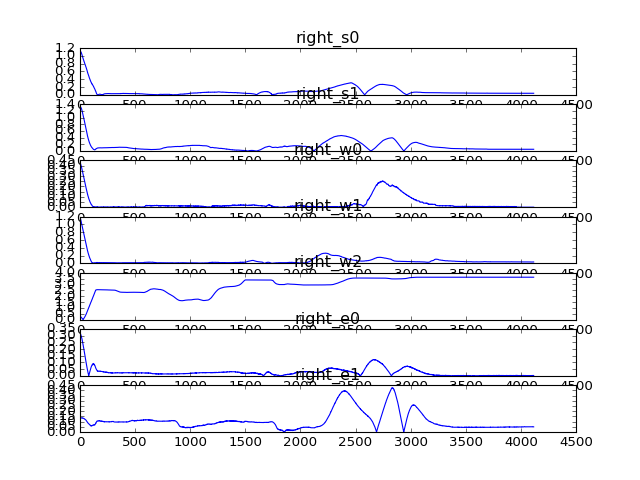

In [8]:
pkl_file = open('../anthony/data/physical/supervised_test/zig_zag_comp_1loop1.pkl', 'rb')
vicon_2, state_2, _, _, error_2, average_error_2 = pickle.load(pkl_file)
pkl_file.close()

error_2 = dict()

theta_fig = plt.figure()
for i, name in enumerate(state_1['theta_measured'].keys()):
    theta_fig.add_subplot(7, 1, i+1)
    plt.plot(state_2['theta_measured'][name])
    plt.plot(state_2['theta_desired'][name])
    plt.title(name)
    plt.legend(['measured', 'desired'])
    error_2[name] = (np.abs(np.array(state_2['theta_measured'][name]) - np.array(state_2['theta_desired'][name])))
 
for key in error_2.keys():
    print(np.mean(error_2[key] * 180/np.pi), key)

err_fig = plt.figure()
for i, name in enumerate(error.keys()):
    err_fig.add_subplot(7, 1, i+1)
    plt.plot(error_2[name])
    plt.title(name)
plt.show()

In [37]:
print("With error compensations: \n")
 
for key in error.keys():
    if not key == 'right_w2':
        print(np.mean(error[key] * 180/np.pi), key)
    
print("\n")
print("With no error compensations: \n")

 
for key in error.keys():
    if not key == 'right_w2':
        print(np.mean(error_2[key] * 180/np.pi), key)

With error compensations: 

(0.9772361549652739, 'right_s0')
(4.811862281203014, 'right_s1')
(0.3076171875112128, 'right_w0')
(2.3838117153349816, 'right_w1')
(1.5592687095795528, 'right_e0')
(4.68933416797129, 'right_e1')


With no error compensations: 

(5.217916114779819, 'right_s0')
(8.322486460481958, 'right_s1')
(1.8729221065129595, 'right_w0')
(3.761663244626435, 'right_w1')
(1.548578588018775, 'right_e0')
(6.160552140895709, 'right_e1')


<IPython.core.display.Javascript object>


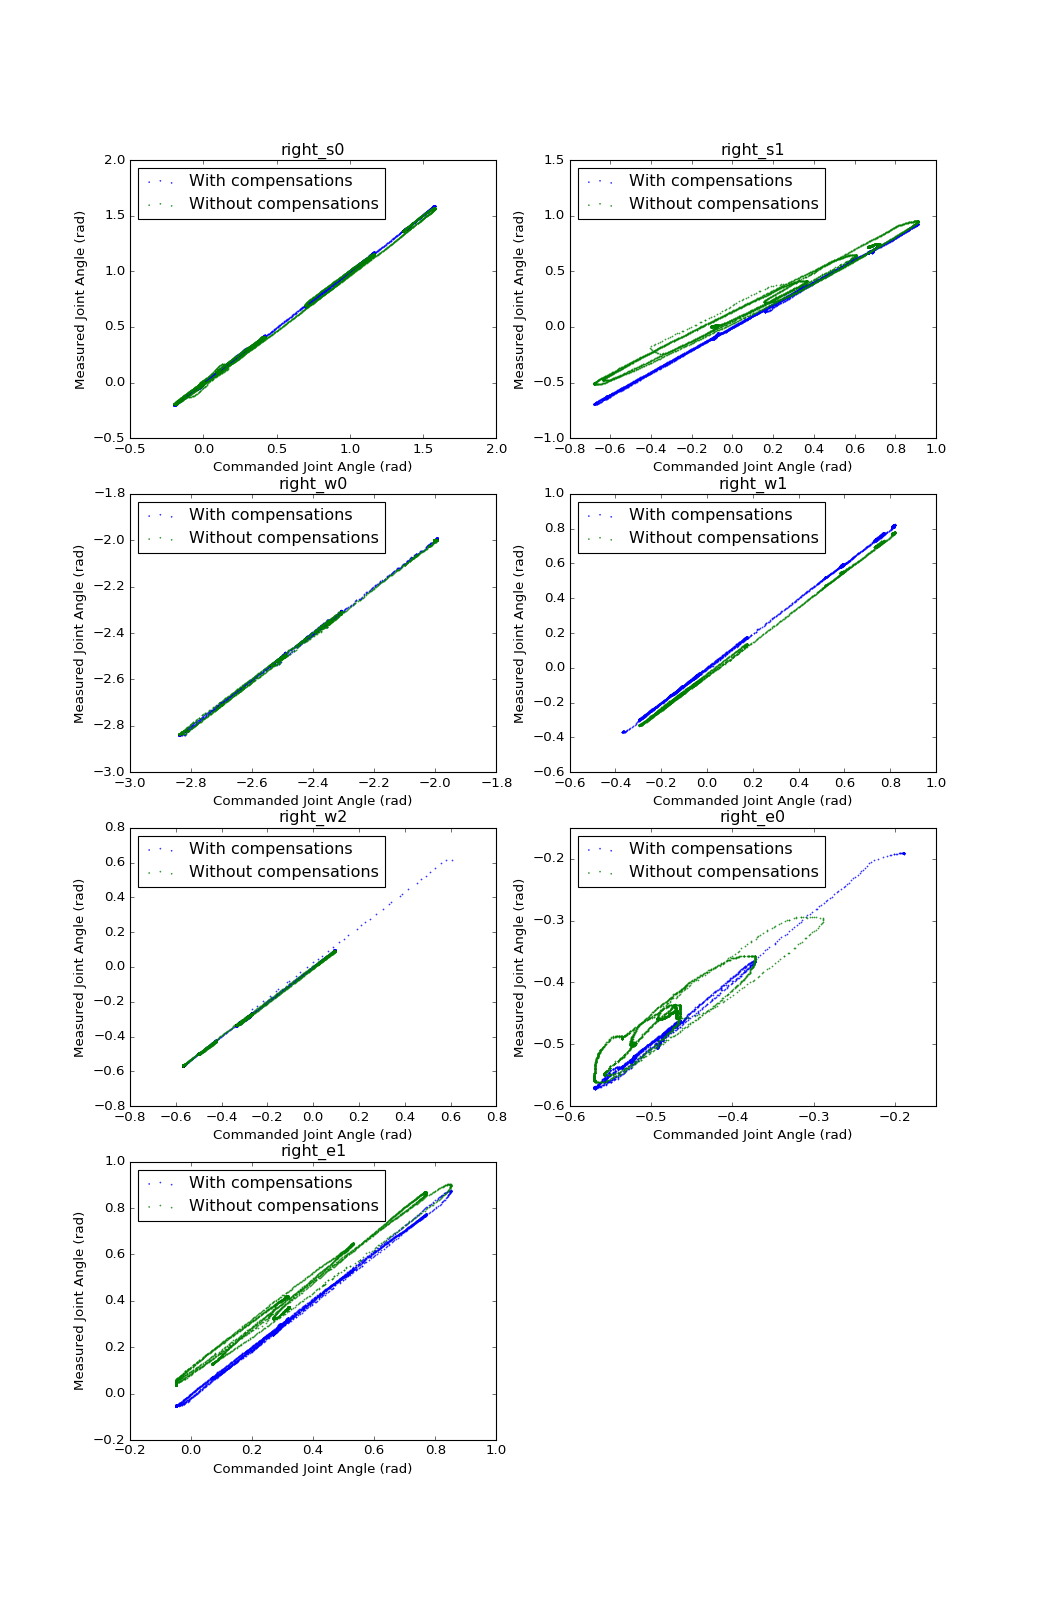

In [21]:
theta_fig = plt.figure(0)
for i, name in enumerate(state_true['theta_measured'].keys()):
    theta_fig.add_subplot(4, 2, i+1)
    plt.scatter(state_true['theta_commanded'][name], state_true['theta_measured'][name], color='blue',s=0.2)
    plt.scatter(state_1['theta_commanded'][name], state_1['theta_measured'][name], color='green', s=0.2)
#     plt.xlim([-3.14, 3.14])
#     plt.ylim([-3.14, 3.14])
    plt.title(name)
    plt.xlabel('Commanded Joint Angle (rad)')
    plt.ylabel('Measured Joint Angle (rad)')
    plt.legend(['With compensations', 'Without compensations'], loc=2)
    
theta_fig.set_size_inches(13, 20, forward=True)
plt.show()
    
                         
    